In [15]:
import pandas as pd
#Reading the university enrollment csv file into a pandas dataframe
df= pd.read_csv("/users/rsmart/Downloads/university_enrollment_2306.csv")
#performing data validation on the columns
df['course_type'] = df['course_type'].astype("category")
df['pre_score'] = df['pre_score'].str.replace("-","0").astype(float)
df['post_score'] = df['post_score'].fillna(0)
df['pre_requirement'] = df['pre_requirement'].fillna('None').astype("category")
df['department'] = df['department'].replace('Math','Mathematics').astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   course_id         1850 non-null   int64   
 1   course_type       1850 non-null   category
 2   year              1850 non-null   int64   
 3   enrollment_count  1850 non-null   int64   
 4   pre_score         1850 non-null   float64 
 5   post_score        1850 non-null   float64 
 6   pre_requirement   1850 non-null   category
 7   department        1850 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 78.3 KB


The dataset contains 1850 enteries with 8 features before inspection, The following are the findings and the action taken for each feature.

course_id: No missing values. Datatype is Same as description with each row having a unique value
course_type: No missing values. Has 2 courses online and classroom. Datatype was changed to category
year: No missing values. Datatype is the same as description with years ranging from 2011 to 2022
enrollment_count: Same as description with no missing values
pre_score: 130 missing values represented as '-'. Missing values were replaced with '0' and column converted to float datatype.
post_score:185 missing values, these were replaced with '0'.Datatype is the same as description
pre_requirement: 89 missing values, these were replaced with 'None'. Column converted to category datatype
department: No missing values. There were five departments that is 'Science', 'Mathematics', 'Technology', 'Math' and 'Engineering'. 'Math' was replaced with 'Mathematics' to match the column description and the datatype changed to category

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

From Figure 1 below, the most number of university enrollments had students between 250 to 260, with the lowest number of enrollments having 190 students and there were no enrollments registered with student count of 200 to 220.

/var/folders/bw/pn34j21j20q14nzw3hjbcdzc0000gr/T/ipykernel_6950/3389980211.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


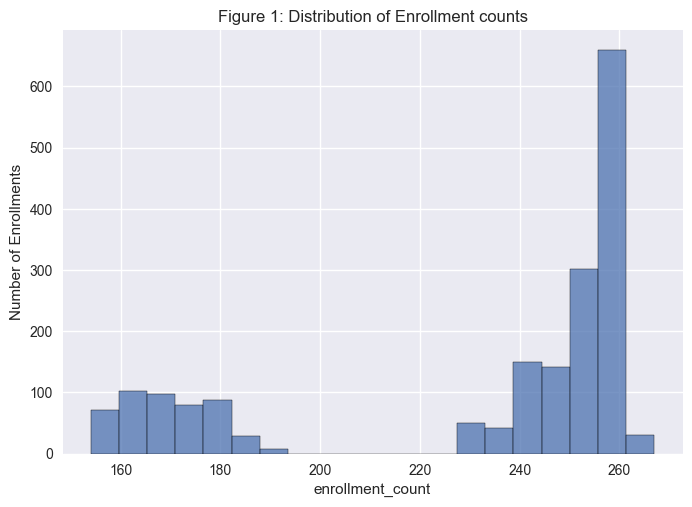

In [7]:
style.use('seaborn')
sns.histplot(data=df, x='enrollment_count',bins=20).set(title='Figure 1: Distribution of Enrollment counts',ylabel='Number of Enrollments');

Online course type has the most observations
The observations are imbalanced across the types. We have unequal representation of online and classroom coure types, With classroom course type having less students compared to online.
Refer to Figure 2 below

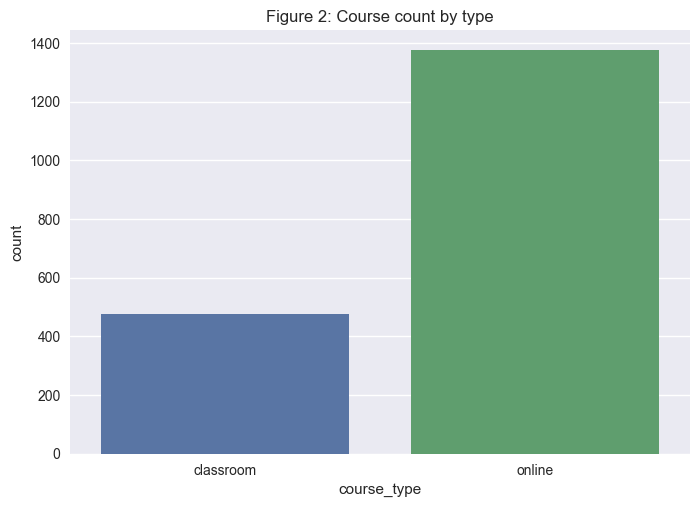

In [8]:
sns.countplot(data=df, x='course_type').set(title='Figure 2: Course count by type');

On average, a large proportion of the university enrolled students register for online courses as shown in figure 3 below.

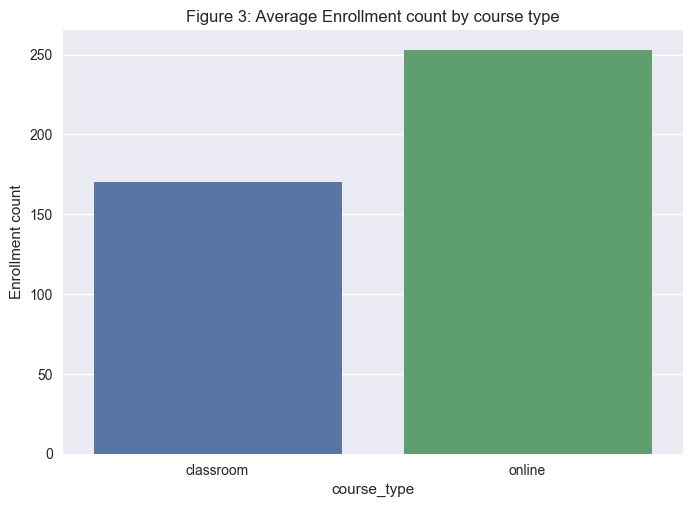

In [9]:
enrollment_mean= df.groupby('course_type')['enrollment_count'].mean()
sns.barplot(x=enrollment_mean.index,y=enrollment_mean.values).set(title='Figure 3: Average Enrollment count by course type',ylabel='Enrollment count');

Regression problem

In [10]:
# Importing the  relevant libraries to use in model deployment
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [11]:
# Generating feature and target matrices
features = df.drop(columns=['course_id','enrollment_count','year'])
target = 'enrollment_count'
#  Changing categorical variables to numerical
X = pd.get_dummies(features, columns=['course_type','pre_requirement','department'])
y= df[target]
# Splitting the data into test and training sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

Baseline model - Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

Comparison model - Random Forest Regressor

In [13]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

I choose Linear regression as a baseline model because it is simple and easily interpretable for regression problem. I chose a random forest regressor as a comparison model because it can be used to compare and potentially improve performance by capturing non-linear relationships and interactions.

Am using root mean squared error metric to compare the two models

In [14]:
import numpy as np
#Computing Root mean squared error for baseline model
RMSE_lr = np.sqrt(MSE(y_test,y_pred_lr))
print(RMSE_lr)
#Computing Root mean squared error for comparison model
RMSE_rf = np.sqrt(MSE(y_test,y_pred_rf))
print(RMSE_rf)

0.3080954076513936
0.342758478559794


Linear Regression performs better. This is because it has a lower root mean squared error(RMSE) compared to that of the comparison model. RMSE measures the difference between the predicted and the actual values. The lower the error, the better the model performance.